In [1]:
from module import step_function
from module import solveSYS2
import matplotlib.pyplot as plt

import numpy as np

In [2]:
#np.seterr(all='raise')

In [3]:
# Create initial data for calculation:
L = 1
dx = 0.031
Nx = int(round(L / dx))
u0, v50, v80, v90, v100, v110 = (1399.9733865471583, 767.727, 0.0451604, 3.07994, 69.5559, 0.0307994)

un, v5n, v8n, v9n, v10n, v11n = [np.ndarray(Nx + 1) for _ in range(6)]

x = np.linspace(0, L, Nx + 1)
for i in range(0, Nx + 1):
    un[i] = u0 * step_function(0.1 - x[i])
    v5n[i] = v50 * step_function(0.1 - x[i])
    v8n[i] = v80 * step_function(0.1 - x[i])
    v9n[i] = v90 * step_function(0.1 - x[i])
    v10n[i] = v100 * step_function(0.1 - x[i])
    v11n[i] = v110 * step_function(0.1 - x[i])

kinetic_coeffs = (0.0037, 1400.0, 2.45, 2000.0, 1.45, 0.17, 0.31, 0.00001, 0.31, 20.0, 0.2, 0.00033, 500.0, 1.0, 0.000011, 0.5)

In [4]:
u1, v51, v81, v91, v101, v111 = (np.copy(un), np.copy(v5n), np.copy(v8n), np.copy(v9n), np.copy(v10n), np.copy(v11n))

c:\Users\Zakhar\Desktop\Sci&Py&WM\pycodes\RDcoagulation\module.py:127: RuntimeWarning: overflow encountered in double_scalars
  bu[i] = un[i] + dt * ((k2 * v10n[i] + k21 * v5n[i] * v10n[i]) * (1.0 - un[i] / u0) - h2 * un[i])


Text(0.5, 1.0, 'v111')

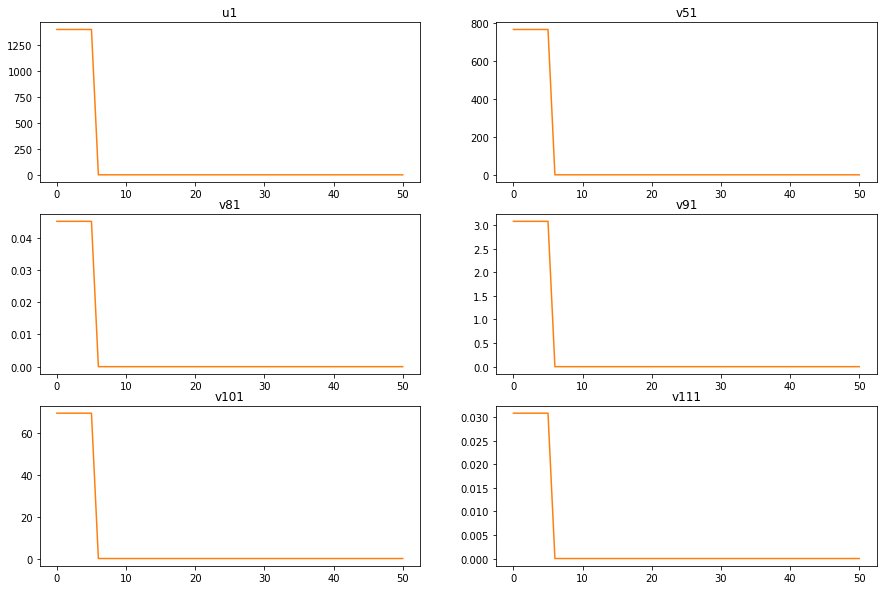

In [5]:
for _ in range(0, 10000):
    u1, v51, v81, v91, v101, v111 = solveSYS2(
        initial_data=(u1, v51, v81, v91, v101, v111),
        L=L,
        dx=dx,
        dt=1e-5,
        coefficients=kinetic_coeffs,
    )

figure, axis = plt.subplots(3, 2, figsize=(15, 10))

axis[0, 0].plot(u1)
axis[0, 0].plot(un)
axis[0, 0].set_title('u1')

axis[0, 1].plot(v51)
axis[0, 1].plot(v5n)
axis[0, 1].set_title('v51')

axis[1, 0].plot(v81)
axis[1, 0].plot(v8n)
axis[1, 0].set_title('v81')

axis[1, 1].plot(v91)
axis[1, 1].plot(v9n)
axis[1, 1].set_title('v91')

axis[2, 0].plot(v101)
axis[2, 0].plot(v10n)
axis[2, 0].set_title('v101')

axis[2, 1].plot(v111)
axis[2, 1].plot(v11n)
axis[2, 1].set_title('v111')